In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# In 2021, these flowcells were calibrated for 0-30 L/h according to the Access DB, but it seems like the calibration curves are valid for 0-100 L/h ??

d_params = dict()

# Flowcell 115074
params_low = [2307.335,	-1.159798,	0.000196410934,	-0.000000011206187]
params_high = [-291.323624,	0.421328121,	-0.00012384805,	0.000000010387615]
params_2021 = [-1.9891E+03, 	1.8936E+00, 	-6.2382E-04, 	8.7297E-08, 	-4.4539E-12]
d_params[115074] = [params_low, params_high, params_2021]


# Flowcell 115083
params_low = [1649.732, 	-0.771511613, 	0.000121641654, 	-0.000000006472841]
params_high = [298.998237, 	0.057130178, 	-0.000049056732, 	0.000000005325247]
params_2021 = [-2.8159E+02,	4.5725E-01,	-1.7459E-04,	2.5519E-08,	-1.3022E-12]
d_params[115083] = [params_low, params_high, params_2021]

# Flowcell 115205
params_low = [2702.368, 	-1.838468, 	0.000421134942, 	-0.000000032465115]
params_high = [-191.336649, 	0.461573381, 	-0.00018612905, 	0.000000020780479]
params_2021 = [1.9417E+03, 	-1.5975E+00, 	5.0647E-04, 	-7.3461E-08, 	4.1083E-12]
d_params[115205] = [params_low, params_high, params_2021]

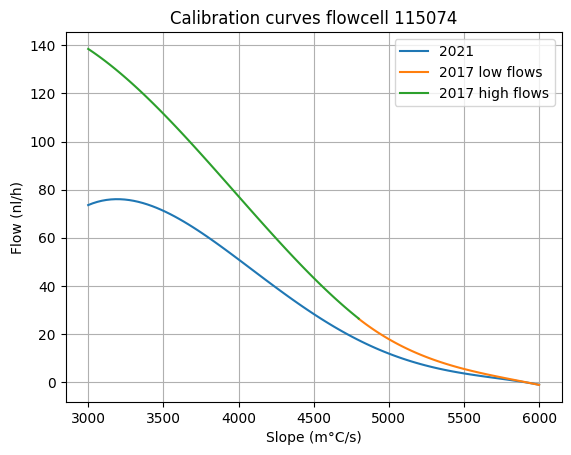

In [4]:
for flowcell, params in d_params.items():
    params_low, params_high, params_2021 =  params
    
    if flowcell == 115205:
        x_min = 2000
        x_max = 4500
        x0 = 3550
    else:
        x_min = 3000
        x_max = 6000
        x0 = 4800
        
    xx_low = np.linspace(x0, x_max, 100)
    xx_high = np.linspace(x_min, x0, 100)
    xx = np.linspace(x_min, x_max, 100)
    yy_low = [np.dot(params_low, [1, x, x**2, x**3]) for x in xx_low]
    yy_high = [np.dot(params_high, [1, x, x**2, x**3]) for x in xx_high]
    yy = [np.dot(params_2021, [1, x, x**2, x**3, x**4]) for x in xx]

    plt.figure()
    plt.title(f'Calibration curves flowcell {flowcell}')
    plt.plot(xx, yy, label = '2021')
    plt.plot(xx_low, yy_low, label='2017 low flows')
    plt.plot(xx_high, yy_high, label='2017 high flows')
    plt.legend()
    plt.grid()
    plt.xlabel('Slope (m°C/s)')
    plt.ylabel('Flow (nl/h)')
    # plt.ylim([0,30])

In [8]:

params_ch13 = [7.1794E+02,	-2.2955E-01,	3.0915E-05,	-2.0720E-09,	5.6292E-14]
params_ch14 = [-3.4010E+03,	1.5812E+00,	-2.6769E-04,	1.9775E-08,	-5.4128E-13]
xx = np.linspace(5500, 11000, 100)
yy1 = [np.dot(params_ch13, [1, x, x**2, x**3, x**4]) for x in xx]
yy2 = [np.dot(params_ch14, [1, x, x**2, x**3, x**4]) for x in xx]
plt.plot(xx, yy1, label='CH13')
plt.plot(xx, yy2, label='CH14')
plt.grid()
plt.legend()